# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Development-of-video-using-Matplotlib" data-toc-modified-id="Development-of-video-using-Matplotlib-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Development of video using Matplotlib</a></div><div class="lev2 toc-item"><a href="#Generates-a-XZ-field-and-show-plots-for-each-z" data-toc-modified-id="Generates-a-XZ-field-and-show-plots-for-each-z-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Generates a XZ field and show plots for each z</a></div>

# Development of video using Matplotlib


In [1]:
# configuration
%load_ext autoreload
%autoreload 2
%load_ext line_profiler
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

from pprint import pprint

/usr/local/lib/python2.7/dist-packages/matplotlib/__init__.py:898: MatplotlibDeprecationWarning: The backend.qt4 rcParam was deprecated in version 2.2.  In order to force the use of a specific Qt binding, either import that binding first, or set the QT_API environment variable.
  mplDeprecation)


In [2]:
from diffractio import degrees, mm, plt, sp, um, np
from diffractio.scalar_sources_X import Scalar_source_X
from diffractio.scalar_masks_X import Scalar_mask_X
from diffractio.scalar_masks_XZ import Scalar_mask_XZ
from numpy.fft.fftpack import fft, ifft
from scipy.signal import convolve2d

%matplotlib inline  

# size of figures
import matplotlib
matplotlib.rcParams['figure.figsize']=(6,6)
import matplotlib.animation as animation

## Generates a XZ field and show plots for each z

In [3]:
# Initial parameters
x0 = np.linspace(-1050 * um, 1050 * um, 1024*2)
z0 = np.linspace(-0.125*um, 4 * mm, 1024*4)
wavelength = 0.6238 * um*10

# Definition of source
u0 = Scalar_source_X(x=x0, wavelength=wavelength)
u0.gauss_beam(A=1, x0=0 * um, z0=0 * um, w0=1000 * um, theta=0. * degrees)

In [4]:
u1 = Scalar_mask_XZ(x=x0, z=z0, wavelength=wavelength, n_background=1)
u1.incident_field(u0)  # insert field

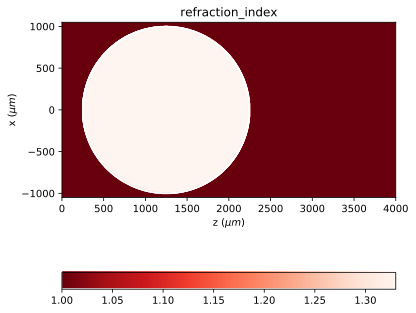

In [5]:
# insert sphere
u1.sphere(r0=(0,1.25*mm), radius=(1*mm,1*mm),refraction_index=1.33, angle=(0,(0,0)))
u1.draw_refraction_index(scale='scaled', colorbar_kind='horizontal')

In [6]:
# BPM propagation 
u1.BPM(verbose=False)

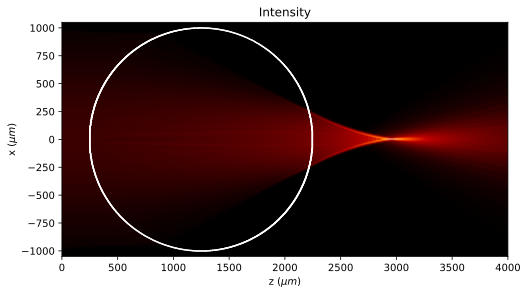

In [7]:
u1.draw(logarithm=True, scale='scaled', draw_borders=True)

(0, 4095)


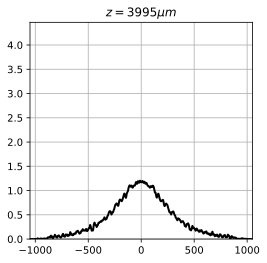

In [8]:
seconds=1.
u1.video(kind='intensity',
              logarithm=True,
              normalize=False,
              time_video=10 * seconds,
              frames_reduction=5,
              filename='lens2.avi',
              dpi=300)